<a href="https://colab.research.google.com/github/Harshh18/Computer-Vision-Practicals/blob/main/Exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

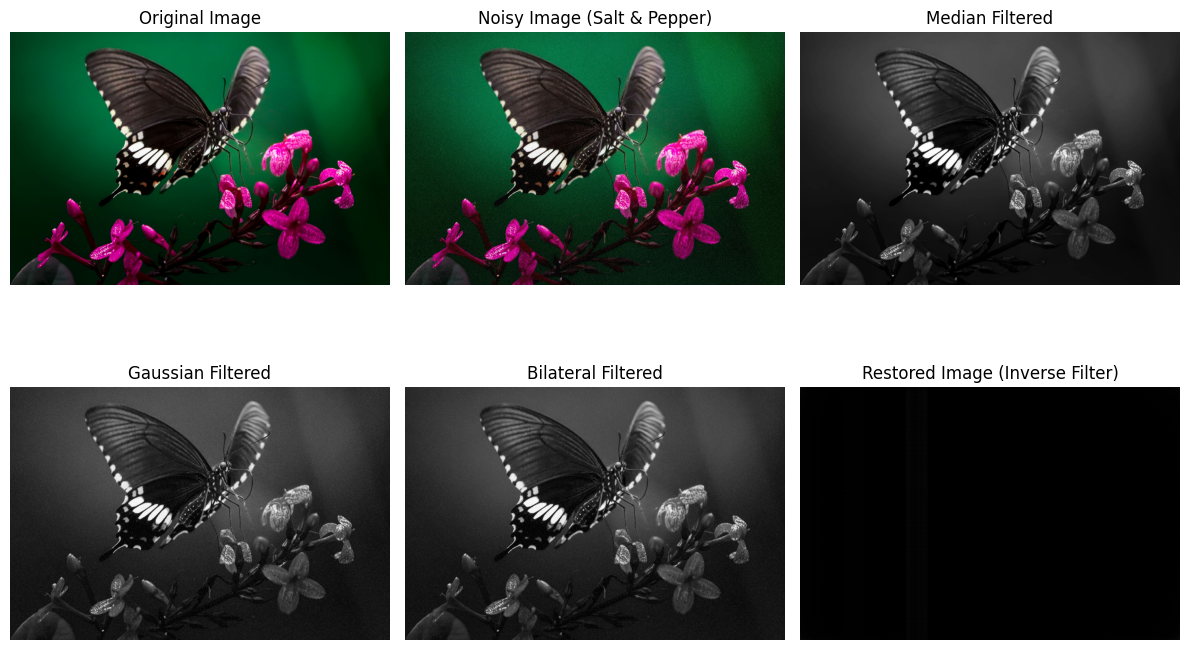

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add different types of noise to an image
def add_noise(img, noise_type="gaussian"):
    if noise_type == "gaussian":
        row, col, ch = img.shape
        mean = 0
        var = 0.01
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row, col, ch))
        gauss = gauss.reshape(row, col, ch)
        noisy = img + gauss
        return np.clip(noisy, 0, 1)

    elif noise_type == "salt_and_pepper":
        s_vs_p = 0.5
        amount = 0.02
        noisy = np.copy(img)
        # Salt mode
        num_salt = np.ceil(amount * img.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
        noisy[coords[0], coords[1], :] = 1

        # Pepper mode
        num_pepper = np.ceil(amount * img.size * (1.0 - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
        noisy[coords[0], coords[1], :] = 0
        return noisy

    elif noise_type == "speckle":
        row, col, ch = img.shape
        gauss = np.random.randn(row, col, ch)
        noisy = img + img * gauss
        return np.clip(noisy, 0, 1)

# Function to perform inverse filtering (simplified for Gaussian blur)
def inverse_filtering(blurred_img, psf):
    # Apply Fourier Transform to both blurred image and PSF
    blurred_fft = np.fft.fft2(blurred_img)
    psf_fft = np.fft.fft2(psf, s=blurred_img.shape)

    # Avoid dividing by zero
    eps = 1e-5
    psf_fft = psf_fft + eps

    # Inverse filtering
    restored_fft = blurred_fft / psf_fft
    restored_img = np.fft.ifft2(restored_fft)
    restored_img = np.abs(restored_img)

    return restored_img

# Function to apply different noise removal filters
def noise_removal(img):
    # Convert to grayscale if image is colored (only for noise removal demo)
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Applying Median Filter
    median_filtered = cv2.medianBlur(img, 5)

    # Applying Gaussian Filter
    gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 0)

    # Applying Bilateral Filter
    bilateral_filtered = cv2.bilateralFilter(img, 9, 75, 75)

    return median_filtered, gaussian_filtered, bilateral_filtered

# Load an example image
img = cv2.imread('/content/Butterfly-image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0  # Normalize image between 0 and 1

# Add noise to the image
noisy_img = add_noise(img, noise_type="salt_and_pepper")

# Convert noisy image to 8-bit format for filtering
noisy_img_uint8 = (noisy_img * 255).astype(np.uint8)

# Remove noise
median_filtered, gaussian_filtered, bilateral_filtered = noise_removal(noisy_img_uint8)

# Create a simple blur (Gaussian blur as PSF for inverse filtering)
psf = cv2.getGaussianKernel(21, 5)
psf = psf * psf.T

# Blur the image
blurred_img = cv2.filter2D(img, -1, psf)

# Perform inverse filtering
restored_img = inverse_filtering(blurred_img[:, :, 0], psf)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Noisy Image (Salt & Pepper)")
plt.imshow(noisy_img)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Median Filtered")
plt.imshow(median_filtered, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Gaussian Filtered")
plt.imshow(gaussian_filtered, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("Bilateral Filtered")
plt.imshow(bilateral_filtered, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title("Restored Image (Inverse Filter)")
plt.imshow(restored_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()